In [1]:
import pandas as pd
import random
import panel as pn

# Ensure the Panel extension is activated
pn.extension()

# Define the mappings from numbers to words and colors
number_to_word_map = {
    0: "Unavailable",
    1: "Pass",
    2: "Degraded",
    3: "Fail",
    4: "Unknown",
    5: "NoImport",
    6: "Danger",
    7: "TotalCollapse"
}

number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Dictionary keys
keys = [
    "static", "dynamic", "function", "functional",
    "operational", "spacial", "polar", "horizontal",
    "vertical", "frequency"
]

class CustomDataFrame:
    def __init__(self, num_rows):
        self.columns = self.generate_columns()
        self.df = pd.DataFrame(columns=self.columns)
        self.fill_random_integers(num_rows)

    def generate_columns(self):
        columns = []
        for i in range(8):
            for j in range(4):
                columns.append(self.generate_string(i, j))
        return columns

    @staticmethod
    def generate_string(num1, num2):
        initial_part = f"[{num1}]{random.choice(keys)}[{num2}]"
        while len(initial_part) <= 64:
            if random.choice([True, False]):
                initial_part = random.choice(keys) + "_" + initial_part
            else:
                initial_part = initial_part + "_" + random.choice(keys)
        return initial_part

    def fill_random_integers(self, num_rows):
        data = [{col: number_to_word_map[random.randint(0, 7)] for col in self.columns} for _ in range(num_rows)]
        self.df = pd.DataFrame(data)

# Instantiate the CustomDataFrame with 10 rows as an example
dataframe_class = CustomDataFrame(num_rows=200)
dataframe_class.df.to_csv("custom_dataframe.csv")

# Function to create a widget for each value in the selected row, along with a label
def display_row_widgets(row_index):
    selected_data = dataframe_class.df.iloc[row_index]
    widgets = []
    for col, val in selected_data.items():
        # Map value to color
        color = number_to_color_map[list(number_to_word_map.values()).index(val)]
        value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
        label_widget = pn.pane.Markdown(f'**{col}**', width=200)
        widgets.append(pn.Row(label_widget, value_widget))
    return pn.Column(*widgets, name='Row Data')

# Apply custom CSS for the TextInput background color
pn.extension(raw_css=[ """.colored-text-input .bk input { color: black; background-color: inherit; }"""])

# Slider widget to select the row
row_slider = pn.widgets.IntSlider(name='Row', start=0, end=len(dataframe_class.df)-1, step=1, width=400)

# Dynamically update the displayed row's widgets when the slider value changes
@pn.depends(row_slider.param.value)
def update_display(row_index):
    return display_row_widgets(row_index)

# Create and display the dashboard
dashboard = pn.Column("# Custom DataFrame Viewer", row_slider, update_display)
dashboard.servable()
#%store dataframe_class

/tmp/ipykernel_32571/4147770139.py:76: PanelDeprecationWarning: "TextInput(..., background='white')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'white'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_32571/4147770139.py:76: PanelDeprecationWarning: "TextInput(..., background='black')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'black'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_32571/4147770139.py:76: PanelDeprecationWarning: "TextInput(..., background='black')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'black'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classe

Column
    [0] Markdown(str)
    [1] IntSlider(end=199, name='Row', width=400)
    [2] ParamFunction(function, _pane=Column, defer_load=False)

In [2]:
df = dataframe_class.df


In [3]:
df.sample(1)

,function_spacial_function_[0]horizontal[0]_vertical_horizontal_dynamic,frequency_frequency_spacial_[0]frequency[1]_static_frequency_operational,[0]static[2]_polar_static_vertical_functional_frequency_spacial_spacial,vertical_function_dynamic_[0]horizontal[3]_horizontal_functional_functional,operational_operational_static_static_spacial_[1]polar[0]_polar_vertical,function_horizontal_[1]function[1]_operational_functional_operational,horizontal_functional_functional_[1]spacial[2]_operational_functional,functional_static_[1]function[3]_horizontal_horizontal_horizontal,dynamic_static_functional_vertical_[2]operational[0]_dynamic_operational,operational_dynamic_[2]dynamic[1]_dynamic_static_static_spacial_functional,...,static_frequency_vertical_dynamic_[5]horizontal[2]_polar_dynamic_vertical,function_vertical_static_function_polar_[5]dynamic[3]_vertical_spacial,function_spacial_dynamic_[6]static[0]_static_polar_function_vertical,frequency_polar_spacial_[6]function[1]_vertical_spacial_polar_static,horizontal_spacial_function_[6]functional[2]_function_operational,horizontal_horizontal_[6]vertical[3]_polar_spacial_polar_polar_frequency,operational_vertical_[7]spacial[0]_function_vertical_spacial_operational,dynamic_frequency_spacial_[7]vertical[1]_polar_vertical_vertical_vertical,functional_function_[7]horizontal[2]_frequency_function_frequency,polar_spacial_frequency_static_[7]frequency[3]_operational_dynamic
102,Degraded,Unknown,Danger,Unknown,TotalCollapse,Pass,TotalCollapse,Degraded,Danger,Pass,...,Danger,Degraded,Fail,Unavailable,Danger,Degraded,Unavailable,Fail,Danger,Pass


In [4]:
import pandas as pd
import random
import panel as pn

# Ensure the Panel extension is activated
pn.extension()

# Define the mappings from numbers to words and colors
number_to_word_map = {
    0: "Unavailable",
    1: "Pass",
    2: "Degraded",
    3: "Fail",
    4: "Unknown",
    5: "NoImport",
    6: "Danger",
    7: "TotalCollapse"
}

number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}

# Dictionary keys
keys = [
    "static", "dynamic", "function", "functional",
    "operational", "spacial", "polar", "horizontal",
    "vertical", "frequency"
]

class CustomDataFrame:
    def __init__(self, num_rows):
        self.columns = self.generate_columns()
        self.df = pd.DataFrame(columns=self.columns)
        self.numeric_df = pd.DataFrame(columns=self.columns)
        self.fill_random_integers(num_rows)

    def generate_columns(self):
        columns = []
        for i in range(8):
            for j in range(4):
                columns.append(self.generate_string(i, j))
        return columns

    @staticmethod
    def generate_string(num1, num2):
        initial_part = f"[{num1}]{random.choice(keys)}[{num2}]"
        while len(initial_part) <= 64:
            if random.choice([True, False]):
                initial_part = random.choice(keys) + "_" + initial_part
            else:
                initial_part = initial_part + "_" + random.choice(keys)
        return initial_part

    def fill_random_integers(self, num_rows):
        data = [{col: number_to_word_map[random.randint(0, 7)] for col in self.columns} for _ in range(num_rows)]
        self.df = pd.DataFrame(data)
        self.numeric_df = pd.DataFrame(data)
        self.numeric_df = self.numeric_df.replace({col: {number_to_word_map[val]: val for val in number_to_word_map.keys()} for col in self.numeric_df.columns})

# Instantiate the CustomDataFrame with 10 rows as an example
dataframe_class = CustomDataFrame(num_rows=200)

# Function to create a widget for each value in the selected row, along with a label
def display_row_widgets(row_index):
    selected_data = dataframe_class.df.iloc[row_index]
    numeric_data = dataframe_class.numeric_df.iloc[row_index]
    widgets = []
    for col, val in selected_data.items():
        # Map value to color
        color = number_to_color_map[list(number_to_word_map.values()).index(val)]
        value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
        label_widget = pn.pane.Markdown(f'**{col}**', width=200)
        widgets.append(pn.Row(label_widget, value_widget))
    return pn.Column(*widgets, name='Row Data')

# Apply custom CSS for the TextInput background color
pn.extension(raw_css=[ """.colored-text-input .bk input { color: black; background-color: inherit; }"""])

# Slider widget to select the row
row_slider = pn.widgets.IntSlider(name='Row', start=0, end=len(dataframe_class.df)-1, step=1, width=400)

# Dynamically update the displayed row's widgets when the slider value changes
@pn.depends(row_slider.param.value)
def update_display(row_index):
    return display_row_widgets(row_index)

# Create and display the dashboard
dashboard = pn.Column("# Custom DataFrame Viewer", row_slider, update_display)
dashboard.servable()

/tmp/ipykernel_32571/2074942841.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.numeric_df = self.numeric_df.replace({col: {number_to_word_map[val]: val for val in number_to_word_map.keys()} for col in self.numeric_df.columns})


/tmp/ipykernel_32571/2074942841.py:79: PanelDeprecationWarning: "TextInput(..., background='green')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'green'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_32571/2074942841.py:79: PanelDeprecationWarning: "TextInput(..., background='blue')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'blue'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['colored-text-input'])
/tmp/ipykernel_32571/2074942841.py:79: PanelDeprecationWarning: "TextInput(..., background='blue')" is deprecated and will be removed in version 1.4, use "TextInput(..., styles={'background': 'blue'})" instead.
  value_widget = pn.widgets.TextInput(value=val, disabled=True, width=150, background=color, css_classes=['

Column
    [0] Markdown(str)
    [1] IntSlider(end=199, name='Row', width=400)
    [2] ParamFunction(function, _pane=Column, defer_load=False)

In [5]:
# Sample 5 rows from the numeric dataframe
numeric_sample = dataframe_class.numeric_df.sample(5)

# Display the sampled dataframe
numeric_sample

,vertical_polar_operational_[0]polar[0]_functional_dynamic_dynamic,dynamic_polar_vertical_operational_[0]vertical[1]_functional_horizontal,operational_frequency_spacial_functional_[0]vertical[2]_horizontal,operational_vertical_functional_[0]horizontal[3]_functional_frequency,spacial_horizontal_polar_[1]spacial[0]_operational_polar_spacial_vertical,frequency_dynamic_[1]vertical[1]_operational_function_dynamic_functional,function_functional_function_horizontal_[1]horizontal[2]_horizontal,vertical_operational_dynamic_[1]function[3]_polar_frequency_polar_static,polar_horizontal_spacial_vertical_[2]horizontal[0]_dynamic_horizontal,polar_functional_[2]functional[1]_frequency_functional_horizontal,...,spacial_dynamic_horizontal_static_[5]vertical[2]_vertical_vertical,spacial_operational_[5]operational[3]_static_spacial_polar_horizontal,polar_vertical_[6]dynamic[0]_operational_functional_vertical_vertical,operational_functional_functional_[6]spacial[1]_vertical_function_functional,polar_[6]operational[2]_horizontal_operational_horizontal_functional,spacial_vertical_polar_[6]operational[3]_frequency_dynamic_vertical,spacial_static_function_operational_[7]dynamic[0]_frequency_polar,vertical_[7]polar[1]_frequency_spacial_dynamic_static_dynamic_functional,frequency_[7]function[2]_polar_function_vertical_vertical_frequency,operational_horizontal_[7]frequency[3]_function_static_function_frequency
106,0,4,6,4,6,4,2,3,6,0,...,1,6,4,4,6,1,4,1,3,7
32,7,4,2,7,7,4,2,1,5,1,...,2,6,4,7,2,0,4,7,2,4
154,7,5,4,7,3,6,6,1,3,0,...,2,7,4,1,6,4,6,6,3,4
124,5,5,4,2,4,6,1,0,5,5,...,5,0,4,2,1,5,2,6,2,0
35,6,2,2,0,6,7,4,7,4,5,...,4,5,4,2,7,1,4,7,4,4


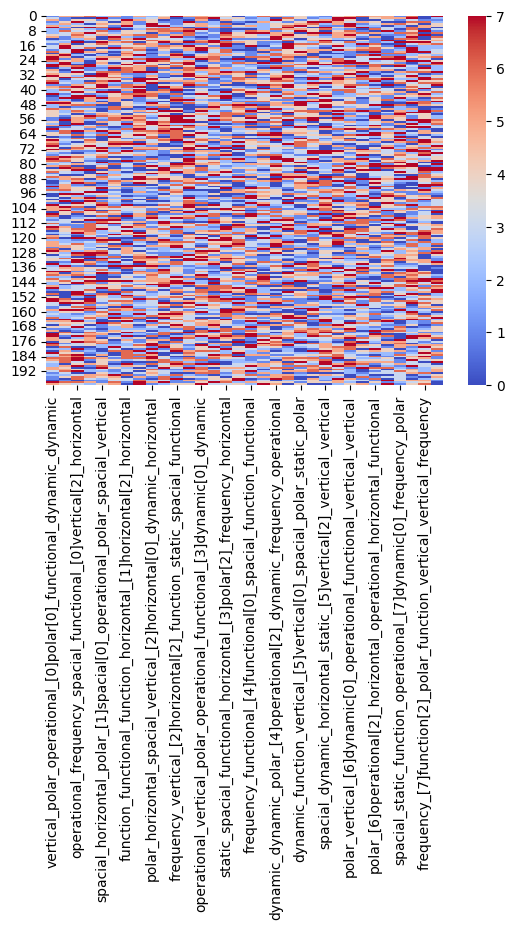

In [6]:
# prompt: modify below so it will render a heat map with these colors for the numeric_df

import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
sns.heatmap(dataframe_class.numeric_df, cmap="coolwarm")

# Display the heatmap
plt.show()


<Axes: >

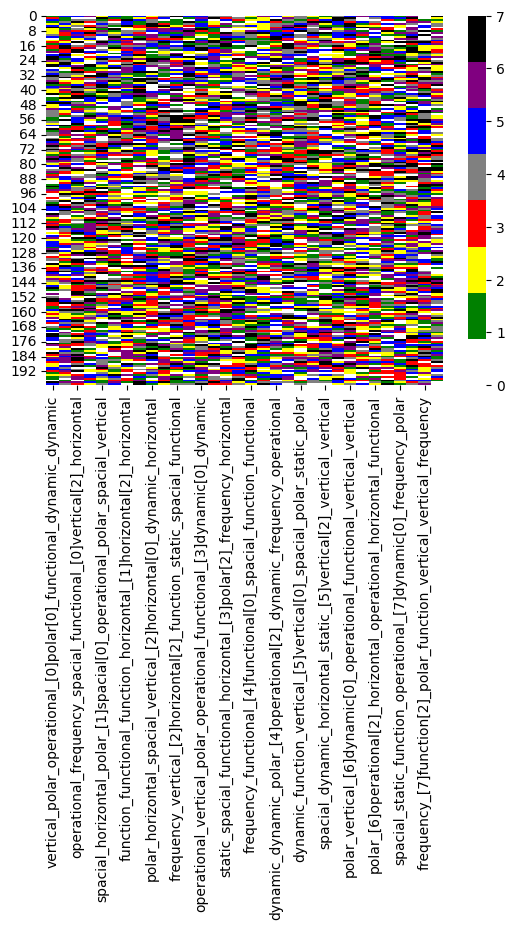

In [7]:
import matplotlib.colors as mcolors

# Create a list of colors based on the dictionary
colors = [number_to_color_map[number] for number in range(8)]

# Define your custom colormap
number_to_color_map = {
    0: "white",  # Unavailable
    1: "green",  # Pass
    2: "yellow", # Degraded
    3: "red",    # Fail
    4: "grey",   # Unknown
    5: "blue",   # NoImport
    6: "purple", # Danger
    7: "black"   # TotalCollapse
}


# Create a custom colormap
cmap = mcolors.ListedColormap(colors)

# Create the heatmap
sns.heatmap(dataframe_class.numeric_df, cmap=cmap)